# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
import matplotlib.pyplot as plt

Load the data: load the wine dataset from sklearn, and assign the feature names to a variable called X.

In [161]:
# your code here:
from sklearn import datasets
from sklearn.datasets import load_wine

In [162]:
wine = load_wine()

In [163]:

print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [164]:
X = pd.DataFrame(wine['data'], columns=wine['feature_names'])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Challenge 1: K-Means

#### 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [165]:
# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:

from sklearn.preprocessing import StandardScaler

X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep, columns = X.columns).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [166]:
# Its has scaled the data and also rounded it up
round(pd.DataFrame(X_prep, columns = X.columns).describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0,178.0
mean,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-4.0,-3.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
max,2.0,3.0,3.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0


Train a KMeans clustering model on the data set using 8 clusters

In [167]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state = 1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [168]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
print(pd.Series(clusters).value_counts().sort_index())

# Explore the cluster assignment in the original dataset
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters # this creates a seperate columns for cluster
X_df.head()

0    18
1    23
2    17
3    29
4    23
5    26
6     4
7    38
dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,7
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,7
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,7
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,7
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Compute the silhouette score for the model

[2, 3, 4, 5, 6, 7, 8]
[0.25931695553182554, 0.2848589191898987, 0.2472914654135894, 0.2530132452438398, 0.2007058222128914, 0.19862052942898747, 0.14621046375905294]


Text(0.5, 1.0, 'silhouette score showing the optimal k')

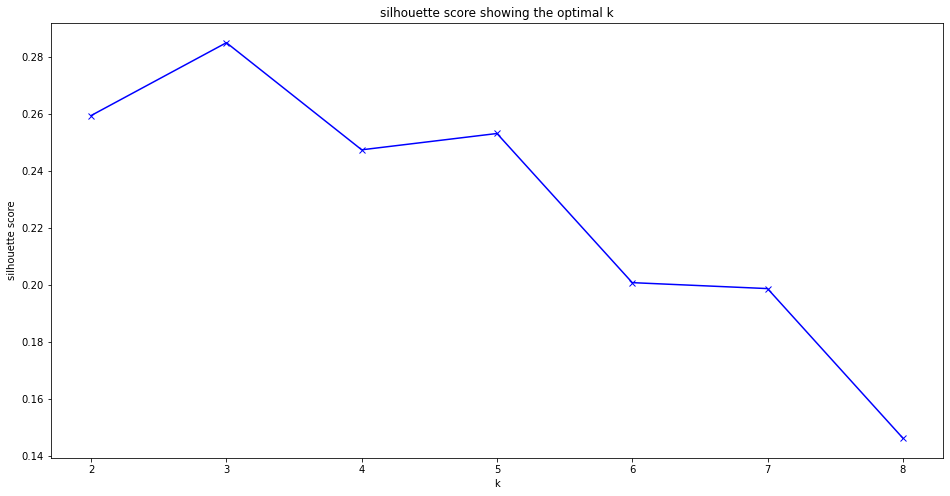

In [169]:
from sklearn.metrics import silhouette_score

K = range(2, 9)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))
    
print(list(K))
print(silhouette)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('silhouette score showing the optimal k')


#### 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [170]:
kmeans = KMeans(n_clusters=5, random_state = 1234)
kmeans.fit(X_prep)

KMeans(n_clusters=5, random_state=1234)

[2, 3, 4, 5]
[0.25931695553182554, 0.2848589191898987, 0.2472914654135894, 0.2530132452438398]


Text(0.5, 1.0, 'silhouette score showing the optimal k')

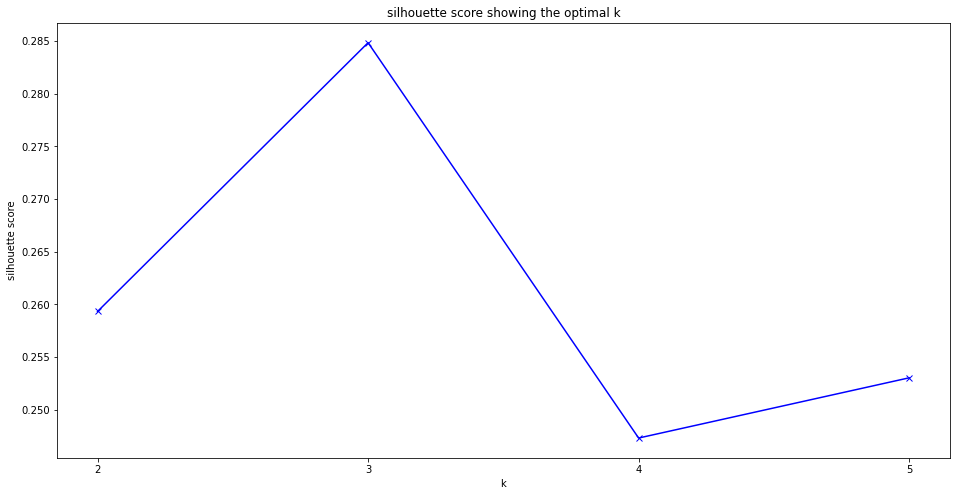

In [171]:
# your code here:

from sklearn.metrics import silhouette_score

K = range(2, 6)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))
    
print(list(K))
print(silhouette)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('silhouette score showing the optimal k')

#### 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [172]:
# your code here:
kmeans = KMeans(n_clusters=3, random_state = 1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

#### 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

Please do two visualizations: one with inertia, and one with the silhouette score.

[2, 3, 4]
[0.25931695553182554, 0.2848589191898987, 0.2472914654135894]


Text(0.5, 1.0, 'silhouette score showing the optimal k')

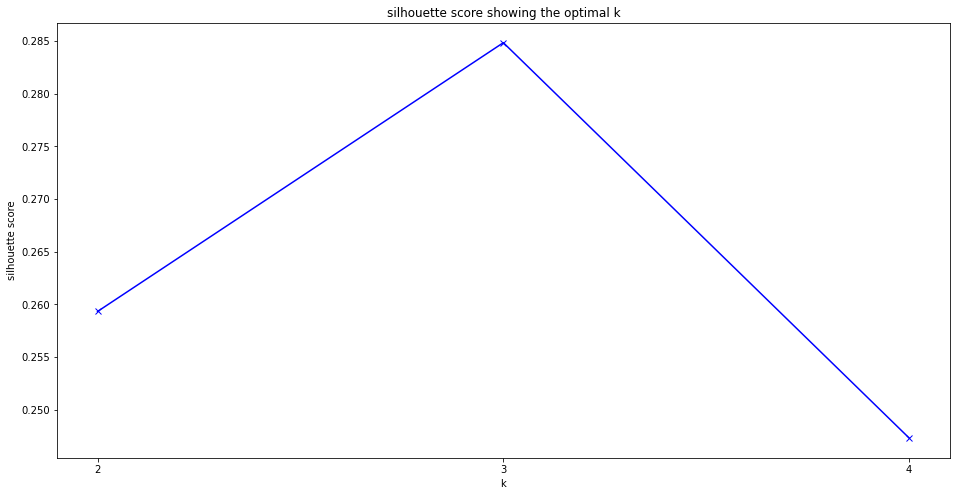

In [173]:
# your code here:
K = range(2, 5)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))
    
print(list(K))
print(silhouette)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('silhouette score showing the optimal k')

## Challenge 2: Aggromerative Clustering

#### 1. Please fit an AgglomerativeClustering model and compare the results you get to the KMeans results. Plot an elbow curve using the silhouette score.

In [174]:
from sklearn.cluster import AgglomerativeClustering

In [175]:
# fit model and predict clusters
X_prep['clusters'] = model.fit_predict(X_prep)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

#### 2. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## Bonus Challenge: 
#### Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [177]:
from sklearn.decomposition import PCA

#help(PCA)

In [179]:
#from sklearn.decomposition import PCA
pca = PCA(n_components=4, svd_solver='full')
pca1=pca.fit(X_prep)
X_df3 = pd.DataFrame(pca1.transform(X_prep))
#X_df3.head()
round(X_df3.corr(), 17) # the correlation is zero in the newly generated features
# beacuse the newly generated features are orthogonal

,0,1,2,3
0,1.000000e+00,-6.600000e-16,1.000000e-16,0.000000e+00
1,-6.600000e-16,1.000000e+00,3.100000e-16,-2.300000e-16
2,1.000000e-16,3.100000e-16,1.000000e+00,1.000000e-16
3,0.000000e+00,-2.300000e-16,1.000000e-16,1.000000e+00


In [180]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.36198848 0.1920749  0.11123631 0.0706903 ]
[28.94203422 21.08225141 16.04371561 12.78973645]
